In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
capital_budget_data = pd.read_csv('fy24_rec_cap_bud.csv')
operational_budget_data = pd.read_csv('fy24_rec_op_bud.csv')


operational_budget_data.head()


,Cabinet,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Adopted
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1584054.209,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.9,99314,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,44938,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.3,29630,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.6,16164.36,24900,36115


In [3]:
capital_budget_data.head()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,Improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,750000,1250000,0,0,...,0,0,100000,1900000,0,0,0,0,0,2000000
1,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,Repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,0,...,0,100000,1500000,200000,0,0,0,0,0,1800000
2,Boston Centers for Youth and Families,BCYF North End Community Center,Develop a design for a new North End Community...,Public Facilities Department,In Design,North End,5000000,63000000,0,0,...,0,400000,3000000,64600000,0,0,0,0,20000000,88000000
3,Boston Centers for Youth and Families,Pool Repairs,Renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,1300000,1000000,0,0,...,383450,450000,700000,766550,0,0,0,0,0,2300000
4,Boston Centers for Youth and Families,Youth Budget Round 4,Engage youth across the City to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,1000000,0,0,0,...,17140,25000,250000,707860,0,0,0,0,0,1000000


## Data Preprocessing

### 1.1 Capital Budget Cleaning

In [4]:
# Check for missing vals
missing_values_capital_budget = capital_budget_data.isnull().sum()

# Display columns with missing values and their count of missing values
missing_values_capital_budget[missing_values_capital_budget > 0]

## --> Good, no missing values

Series([], dtype: int64)

In [5]:
# Ensure property dtype

capital_budget_data.columns = capital_budget_data.columns.str.strip()

financial_columns_corrected = [
    'Authorization_Existing', 'Authorization_FY', 'Authorization_Future',
    'Grant_Existing', 'Grant_FY', 'Grant_Future', 'GO_Expended',
    'Capital_Year_0', 'CapitalYear_1', 'Capital_Year_25',
    'Grant_Expended', 'Grant_Year_0', 'Grant_Year_1', 'GrantYear_25',
    'External_Funds', 'Total_Project_Budget'
]

capital_budget_data[financial_columns_corrected] = capital_budget_data[financial_columns_corrected].apply(pd.to_numeric, errors='coerce')

categorical_columns = ['Department', 'Project_Name', 'Scope_Of_Work', 'PM_Department', 'Project_Status', 'Neighborhood']
capital_budget_data[categorical_columns] = capital_budget_data[categorical_columns].astype('object')

data_types_after_conversion_retry = capital_budget_data.dtypes

data_types_after_conversion_retry


Department                 object
Project_Name               object
Scope_Of_Work              object
PM_Department              object
Project_Status             object
Neighborhood               object
Authorization_Existing      int64
Authorization_FY            int64
Authorization_Future        int64
Grant_Existing              int64
Grant_FY                    int64
Grant_Future                int64
GO_Expended                 int64
Capital_Year_0              int64
CapitalYear_1               int64
Capital_Year_25             int64
Grant_Expended              int64
Grant_Year_0                int64
Grant_Year_1                int64
GrantYear_25                int64
External_Funds              int64
Total_Project_Budget      float64
dtype: object

### 1.2 Capital Budget Data Cleaning

In [6]:
# Convert financial columns to numeric data types
financial_columns_operational_budget = [
    'FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted'
]
operational_budget_data[financial_columns_operational_budget] = operational_budget_data[financial_columns_operational_budget].apply(pd.to_numeric, errors='coerce')

categorical_columns_operational_budget = ['Cabinet', 'Dept', 'Program', 'Expense Category']
operational_budget_data[categorical_columns_operational_budget] = operational_budget_data[categorical_columns_operational_budget].astype('object')

data_types_after_conversion_operational_budget = operational_budget_data.dtypes

data_types_after_conversion_operational_budget


Cabinet                 object
Dept                    object
Program                 object
Expense Category        object
FY21 Actual Expense    float64
FY22 Actual Expense    float64
FY23 Appropriation     float64
FY24 Adopted           float64
dtype: object

In [7]:
negative_values_capital_budget = (capital_budget_data[financial_columns_corrected] < 0).sum()

missing_values_capital_budget_recheck = capital_budget_data.isnull().sum()

# negative_values_capital_budget

In [8]:
missing_values_capital_budget_recheck[missing_values_capital_budget_recheck > 0]

Total_Project_Budget    9
dtype: int64

In [9]:
capital_budget_data['GO_Expended'] = capital_budget_data['GO_Expended'].apply(abs)

# Check again for negative values
negative_values_capital_budget_after_correction = (capital_budget_data[financial_columns_corrected] < 0).sum()
negative_values_capital_budget_after_correction

Authorization_Existing    0
Authorization_FY          0
Authorization_Future      0
Grant_Existing            0
Grant_FY                  0
Grant_Future              0
GO_Expended               0
Capital_Year_0            0
CapitalYear_1             0
Capital_Year_25           0
Grant_Expended            0
Grant_Year_0              0
Grant_Year_1              0
GrantYear_25              0
External_Funds            0
Total_Project_Budget      0
dtype: int64

In [10]:
# Handle Missing Values in Capital Budget Data
median_total_project_budget = capital_budget_data['Total_Project_Budget'].median()
capital_budget_data['Total_Project_Budget'].fillna(median_total_project_budget, inplace=True)

# Check again for missing values
missing_values_capital_budget_after_correction = capital_budget_data.isnull().sum()
missing_values_capital_budget_after_correction[missing_values_capital_budget_after_correction > 0]


Series([], dtype: int64)

## Analysis and Visualization (Base Project)

In [11]:
# Spending Analysis: Spending by Department

# 1. Spending by Department (Capital Budget)
spending_by_department_capital = capital_budget_data.groupby('Department')['Total_Project_Budget'].sum().sort_values(ascending=False)

# 2. Spending by Department (Operational Budget)
spending_by_department_operational = operational_budget_data.groupby('Dept')['FY21 Actual Expense'].sum().sort_values(ascending=False)

spending_by_department_capital, spending_by_department_operational


(Department
 Public Works Department                    943321278.0
 Boston Public Schools                      904255151.0
 Property Management Department             342620000.0
 Parks and Recreation Department            331889348.0
 Transportation Department                  294968774.0
 Mayor's Office of Housing                  208000000.0
 Boston Centers for Youth and Families      203475000.0
 Environment Department                     172032167.0
 Boston Public Library                      154290000.0
 Fire Department                            152147500.0
 Public Health Commission                   110257000.0
 Department of Innovation and Technology     83686892.0
 Police Department                           81421000.0
 Boston Planning and Development Agency      35125000.0
 Office of Arts & Culture                    20975000.0
 Emergency Management                         1500000.0
 Office of New Urban Mechanics                 200000.0
 Name: Total_Project_Budget, dtype: 

#### Spending by Department Visualization

/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

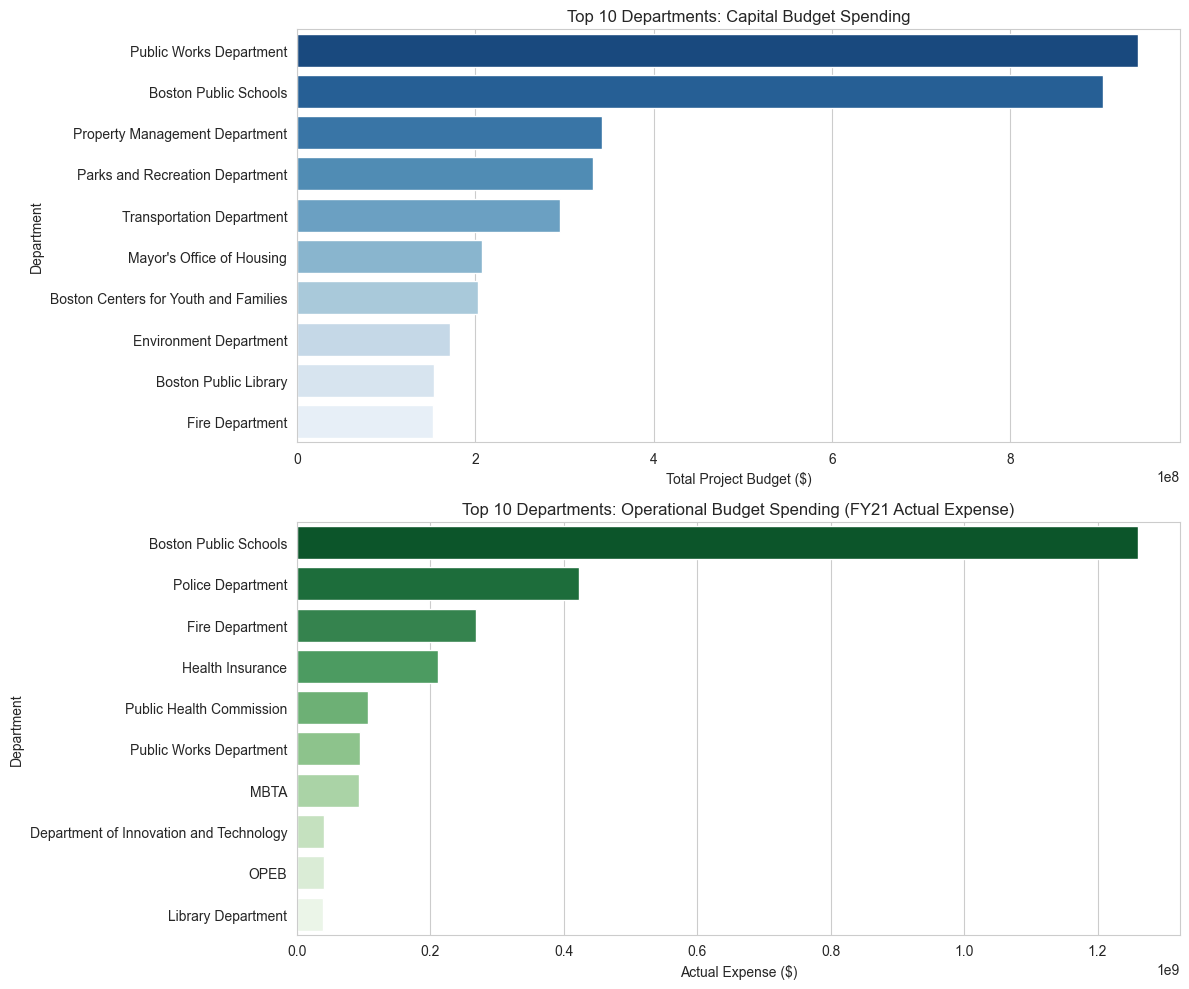

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Capital Budget: Spending by Department
sns.barplot(x=spending_by_department_capital.head(10), y=spending_by_department_capital.head(10).index, ax=axes[0], palette="Blues_r")
axes[0].set_title('Top 10 Departments: Capital Budget Spending')
axes[0].set_xlabel('Total Project Budget ($)')
axes[0].set_ylabel('Department')

# Operational Budget: Spending by Department
sns.barplot(x=spending_by_department_operational.head(10), y=spending_by_department_operational.head(10).index, ax=axes[1], palette="Greens_r")
axes[1].set_title('Top 10 Departments: Operational Budget Spending (FY21 Actual Expense)')
axes[1].set_xlabel('Actual Expense ($)')
axes[1].set_ylabel('Department')

plt.tight_layout()
plt.show()


#### Spending by Category

/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


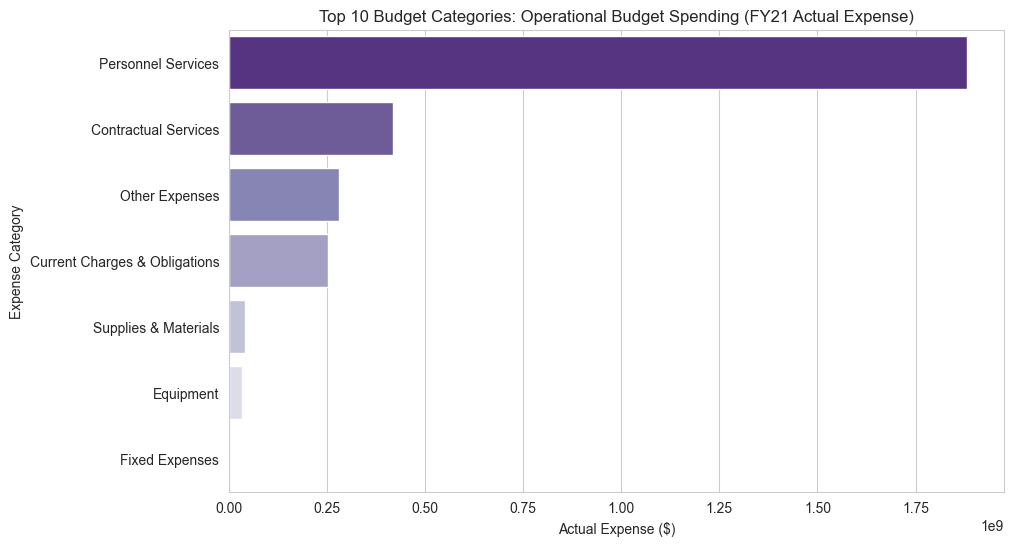

Expense Category
Personnel Services               1.881134e+09
Contractual Services             4.188497e+08
Other Expenses                   2.816448e+08
Current Charges & Obligations    2.529030e+08
Supplies & Materials             4.133135e+07
Equipment                        3.392875e+07
Fixed Expenses                   0.000000e+00
Name: FY21 Actual Expense, dtype: float64

In [16]:
# Analyze spending based on different expense categories
spending_by_budget_category = operational_budget_data.groupby('Expense Category')['FY21 Actual Expense'].sum().sort_values(ascending=False)

# Spending by Budget Category: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=spending_by_budget_category.head(10), y=spending_by_budget_category.head(10).index, palette="Purples_r")
plt.title('Top 10 Budget Categories: Operational Budget Spending (FY21 Actual Expense)')
plt.xlabel('Actual Expense ($)')
plt.ylabel('Expense Category')
plt.show()

spending_by_budget_category.head(10)


#### Spending by Geography Visualization (Capital Budget)

/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


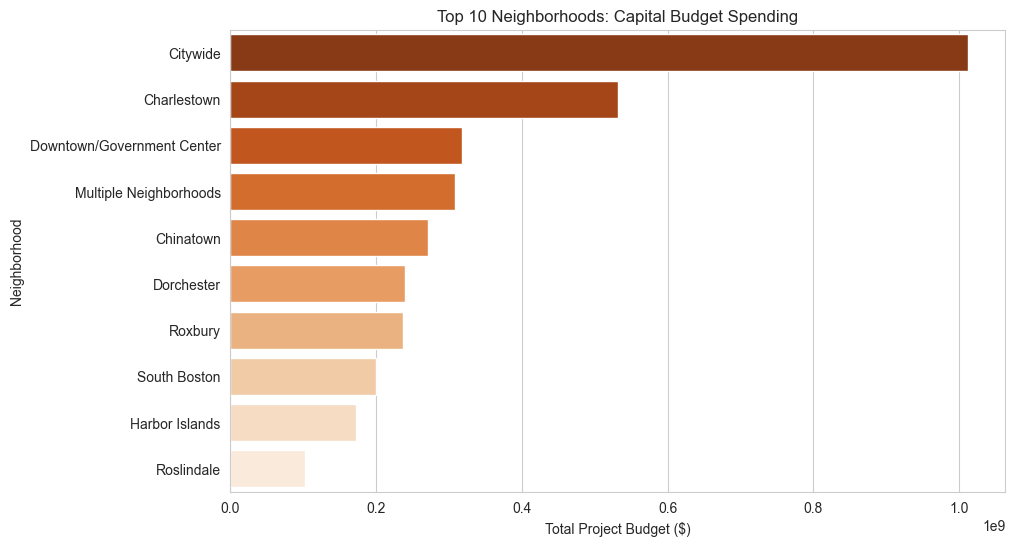

Neighborhood
Citywide                      1.012770e+09
Charlestown                   5.312124e+08
Downtown/Government Center    3.184150e+08
Multiple Neighborhoods        3.078742e+08
Chinatown                     2.712722e+08
Dorchester                    2.394112e+08
Roxbury                       2.373083e+08
South Boston                  2.002500e+08
Harbor Islands                1.717781e+08
Roslindale                    1.024700e+08
Name: Total_Project_Budget, dtype: float64

In [13]:
# spending based on different neighborhoods
spending_by_geography = capital_budget_data.groupby('Neighborhood')['Total_Project_Budget'].sum().sort_values(ascending=False)

# Spending by Geography: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=spending_by_geography.head(10), y=spending_by_geography.head(10).index, palette="Oranges_r")
plt.title('Top 10 Neighborhoods: Capital Budget Spending')
plt.xlabel('Total Project Budget ($)')
plt.ylabel('Neighborhood')
plt.show()

spending_by_geography.head(10)


#### Spending by Program Visualization (Operational Budget)

/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


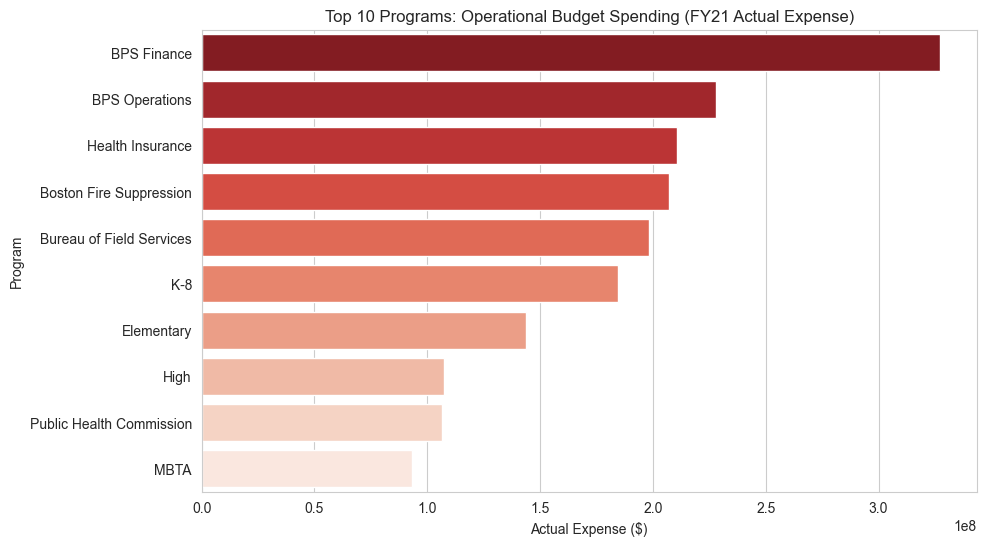

Program
BPS Finance                 3.271445e+08
BPS Operations              2.281540e+08
Health Insurance            2.109008e+08
Boston Fire Suppression     2.072320e+08
Bureau of Field Services    1.982115e+08
K-8                         1.846467e+08
Elementary                  1.438286e+08
High                        1.075153e+08
Public Health Commission    1.064735e+08
MBTA                        9.334511e+07
Name: FY21 Actual Expense, dtype: float64

In [18]:
# Analyze spending based on different programs
spending_by_program = operational_budget_data.groupby('Program')['FY21 Actual Expense'].sum().sort_values(ascending=False)

# Spending by Program: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=spending_by_program.head(10), y=spending_by_program.head(10).index, palette="Reds_r")
plt.title('Top 10 Programs: Operational Budget Spending (FY21 Actual Expense)')
plt.xlabel('Actual Expense ($)')
plt.ylabel('Program')
plt.show()

spending_by_program.head(10)


#### Spending Over Time (Operational Budget)

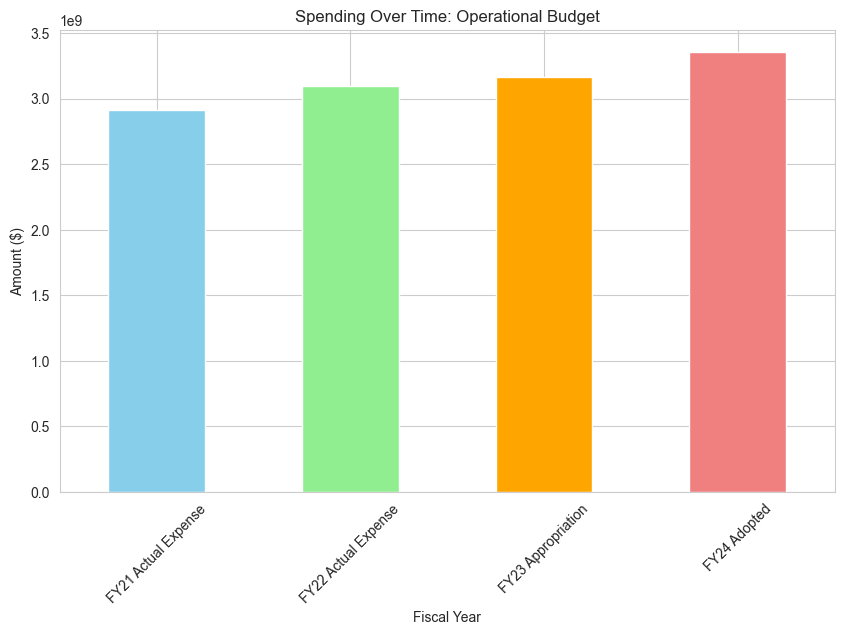

FY21 Actual Expense    2.909792e+09
FY22 Actual Expense    3.095685e+09
FY23 Appropriation     3.162964e+09
FY24 Adopted           3.355182e+09
dtype: float64

In [23]:
# Sum the actual expenses and appropriations for each fiscal year
spending_over_time = operational_budget_data[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']].sum()

# Spending Over Time: Visualization
plt.figure(figsize=(10, 6))
spending_over_time.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Spending Over Time: Operational Budget')
plt.ylabel('Amount ($)')
plt.xlabel('Fiscal Year')
plt.xticks(rotation=45)
plt.show()

spending_over_time



/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/will/mambaforge/envs/cs506/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


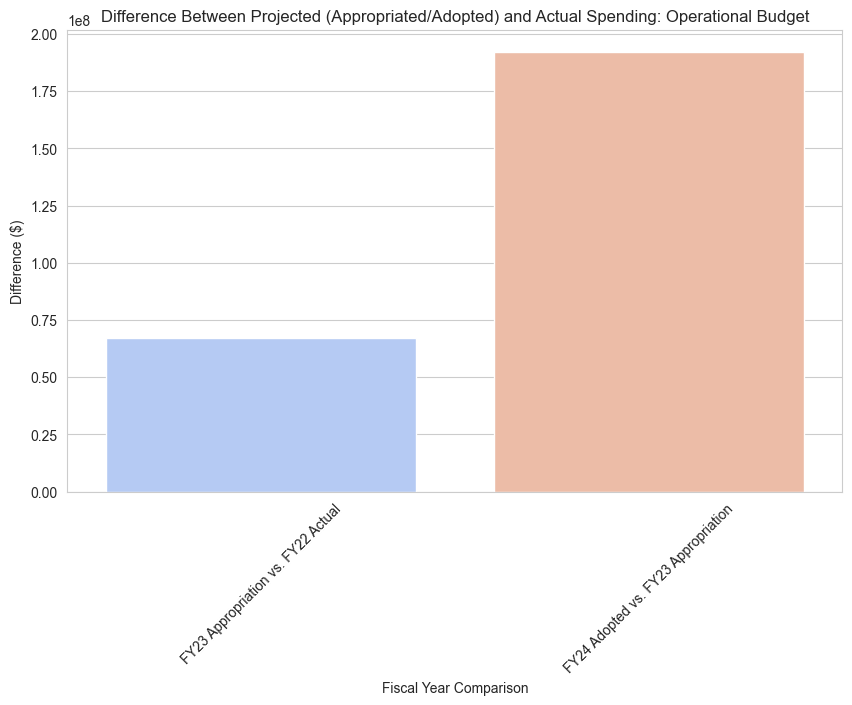

,Fiscal Year Comparison,Difference ($)
0,FY23 Appropriation vs. FY22 Actual,6.727944e+07
1,FY24 Adopted vs. FY23 Appropriation,1.922173e+08


In [25]:
# Difference Between Projected (Appropriated/Adopted) and Actual Spending: Operational Budget

# Calculate the differences for available fiscal years
# Note: Appropriation for FY21 is not available, so we can't calculate the difference for FY21
difference_fy22 = operational_budget_data['FY23 Appropriation'].sum() - operational_budget_data['FY22 Actual Expense'].sum()  # FY23 Appropriation vs. FY22 Actual
difference_fy23 = operational_budget_data['FY24 Adopted'].sum() - operational_budget_data['FY23 Appropriation'].sum()  # FY24 Adopted vs. FY23 Appropriation

# Compile the differences into a DataFrame for visualization
differences_actual_vs_projected_df = pd.DataFrame({
    'Fiscal Year Comparison': ['FY23 Appropriation vs. FY22 Actual', 'FY24 Adopted vs. FY23 Appropriation'],
    'Difference ($)': [difference_fy22, difference_fy23]
})

# Difference Between Projected and Actual Spending: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Fiscal Year Comparison', y='Difference ($)', data=differences_actual_vs_projected_df, palette="coolwarm")
plt.title('Difference Between Projected (Appropriated/Adopted) and Actual Spending: Operational Budget')
plt.ylabel('Difference ($)')
plt.xlabel('Fiscal Year Comparison')
plt.xticks(rotation=45)
plt.show()

differences_actual_vs_projected_df



# Extension Project (Revenue Analysis)

## Revenue Data Loading

In [26]:
# Load the revenue data
revenue_data_path = "fy24_rev_bud.csv"
revenue_data = pd.read_csv(revenue_data_path)

# Display basic information and the first few rows of the revenue data
revenue_data_info = revenue_data.info()
revenue_data_head = revenue_data.head()

revenue_data_info, revenue_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Revenue Category    199 non-null    object 
 1   Account             199 non-null    object 
 2   Cabinet             199 non-null    object 
 3   Department          199 non-null    object 
 4   FY21 Actual         199 non-null    object 
 5   FY22 Actual         199 non-null    object 
 6   FY23 Appropriation  199 non-null    object 
 7   FY24 Adopted        199 non-null    object 
 8   Unnamed: 8          0 non-null      float64
 9   Unnamed: 9          1 non-null      object 
dtypes: float64(1), object(9)
memory usage: 15.7+ KB


(None,
     Revenue Category                   Account  Cabinet            Department  \
 0  Property Tax Levy         Real Estate Taxes  Finance  Assessing Department   
 1  Property Tax Levy     Personal Property Tax  Finance  Assessing Department   
 2  Property Tax Levy      Property Tax Overlay  Finance  Assessing Department   
 3            Excises  MV Excise - Current Year  Finance  Assessing Department   
 4            Excises    MV Excise - Prior Year  Finance  Assessing Department   
 
      FY21 Actual    FY22 Actual FY23 Appropriation   FY24 Adopted  Unnamed: 8  \
 0  2,490,082,613  2,630,469,593      2,784,133,324  2,913,736,657         NaN   
 1    189,939,113    196,499,737        209,010,762    214,236,031         NaN   
 2     -3,735,387    -33,174,590        -29,845,007    -30,000,000         NaN   
 3     36,012,943     36,227,381         34,000,000     34,000,000         NaN   
 4     15,202,795     21,692,077         17,500,000     18,000,000         NaN   
 
   Un

## Revenue Data Cleaning

In [27]:
# 1. Remove Unnamed Columns
revenue_data_cleaned = revenue_data.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

# 2. Convert Financial Data to Numeric
financial_columns_revenue = ['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']
revenue_data_cleaned[financial_columns_revenue] = revenue_data_cleaned[financial_columns_revenue].replace({',': ''}, regex=True).astype(float)

# 3. Handle Missing Values (if any)
missing_values_revenue = revenue_data_cleaned.isnull().sum()
missing_values_revenue = missing_values_revenue[missing_values_revenue > 0]

# 4. Convert Data Types
# The conversion of financial data to numeric has already been done. Other columns should remain as objects (categorical data).

# Display basic information and the first few rows of the cleaned revenue data
revenue_data_cleaned_info = revenue_data_cleaned.info()
revenue_data_cleaned_head = revenue_data_cleaned.head()

missing_values_revenue, revenue_data_cleaned_info, revenue_data_cleaned_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Revenue Category    199 non-null    object 
 1   Account             199 non-null    object 
 2   Cabinet             199 non-null    object 
 3   Department          199 non-null    object 
 4   FY21 Actual         199 non-null    float64
 5   FY22 Actual         199 non-null    float64
 6   FY23 Appropriation  199 non-null    float64
 7   FY24 Adopted        199 non-null    float64
dtypes: float64(4), object(4)
memory usage: 12.6+ KB


(Series([], dtype: int64),
 None,
     Revenue Category                   Account  Cabinet            Department  \
 0  Property Tax Levy         Real Estate Taxes  Finance  Assessing Department   
 1  Property Tax Levy     Personal Property Tax  Finance  Assessing Department   
 2  Property Tax Levy      Property Tax Overlay  Finance  Assessing Department   
 3            Excises  MV Excise - Current Year  Finance  Assessing Department   
 4            Excises    MV Excise - Prior Year  Finance  Assessing Department   
 
     FY21 Actual   FY22 Actual  FY23 Appropriation  FY24 Adopted  
 0  2.490083e+09  2.630470e+09        2.784133e+09  2.913737e+09  
 1  1.899391e+08  1.964997e+08        2.090108e+08  2.142360e+08  
 2 -3.735387e+06 -3.317459e+07       -2.984501e+07 -3.000000e+07  
 3  3.601294e+07  3.622738e+07        3.400000e+07  3.400000e+07  
 4  1.520280e+07  2.169208e+07        1.750000e+07  1.800000e+07  )

## Revenue Data EDA

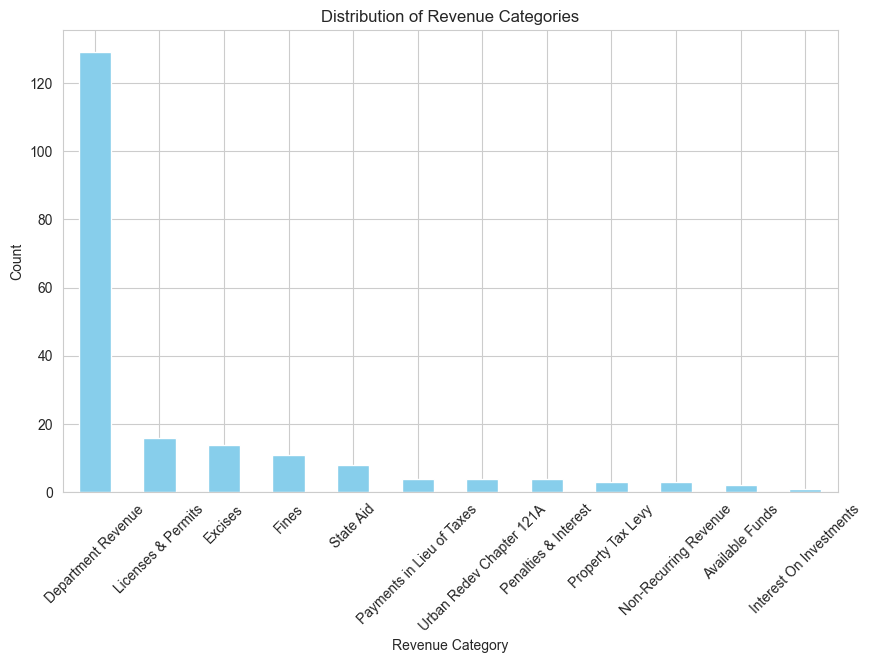

(          Revenue Category                     Account  Cabinet  \
 count                  199                         199      199   
 unique                  12                         106       15   
 top     Department Revenue  Prior Years Reimbursements  Finance   
 freq                   129                          33       66   
 mean                   NaN                         NaN      NaN   
 std                    NaN                         NaN      NaN   
 min                    NaN                         NaN      NaN   
 25%                    NaN                         NaN      NaN   
 50%                    NaN                         NaN      NaN   
 75%                    NaN                         NaN      NaN   
 max                    NaN                         NaN      NaN   
 
                  Department   FY21 Actual   FY22 Actual  FY23 Appropriation  \
 count                   199  1.990000e+02  1.990000e+02        1.990000e+02   
 unique               

In [28]:
# Exploratory Data Analysis (EDA) on Revenue Data

# 1. Summary Statistics
summary_statistics = revenue_data_cleaned.describe(include='all')

# 2. Distribution of Revenue Categories
revenue_category_distribution = revenue_data_cleaned['Revenue Category'].value_counts()

# 3. Distribution of Revenue in Different Fiscal Years
revenue_distribution_fy21 = revenue_data_cleaned['FY21 Actual'].describe()
revenue_distribution_fy22 = revenue_data_cleaned['FY22 Actual'].describe()
revenue_distribution_fy23 = revenue_data_cleaned['FY23 Appropriation'].describe()
revenue_distribution_fy24 = revenue_data_cleaned['FY24 Adopted'].describe()

# 4. Correlation Analysis
correlation_matrix = revenue_data_cleaned[financial_columns_revenue].corr()

# Visualization: Distribution of Revenue Categories
plt.figure(figsize=(10, 6))
revenue_category_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Revenue Categories')
plt.xlabel('Revenue Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

summary_statistics, revenue_distribution_fy21, revenue_distribution_fy22, revenue_distribution_fy23, revenue_distribution_fy24, correlation_matrix


## Revenue Shift Analysis

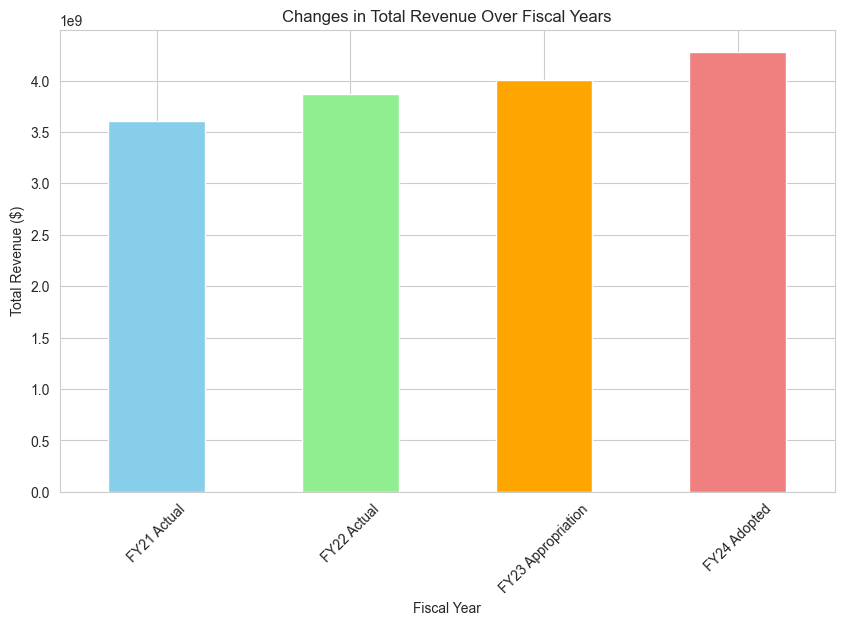

(FY21 Actual           3.611055e+09
 FY22 Actual           3.867907e+09
 FY23 Appropriation    4.002989e+09
 FY24 Adopted          4.279862e+09
 dtype: float64,
                             FY21 Actual   FY22 Actual  FY23 Appropriation  \
 Revenue Category                                                            
 Available Funds            2.000000e+07  0.000000e+00        3.095000e+07   
 Department Revenue         6.751683e+07  8.361009e+07        6.127533e+07   
 Excises                    9.492981e+07  1.916135e+08        1.512750e+08   
 Fines                      5.215256e+07  6.176805e+07        5.417000e+07   
 Interest On Investments    3.614562e+06  4.429142e+06        3.000000e+06   
 Licenses & Permits         6.733173e+07  8.403168e+07        6.493500e+07   
 Non-Recurring Revenue      4.000000e+07  5.500000e+07        8.000000e+07   
 Payments in Lieu of Taxes  6.311320e+07  5.660882e+07        5.109902e+07   
 Penalties & Interest       1.031984e+07  1.275025e+07     

In [29]:
# 1. Changes in Total Revenue Over Fiscal Years
total_revenue_fy21 = revenue_data_cleaned['FY21 Actual'].sum()
total_revenue_fy22 = revenue_data_cleaned['FY22 Actual'].sum()
total_revenue_fy23 = revenue_data_cleaned['FY23 Appropriation'].sum()
total_revenue_fy24 = revenue_data_cleaned['FY24 Adopted'].sum()

total_revenue_changes = pd.Series({
    'FY21 Actual': total_revenue_fy21,
    'FY22 Actual': total_revenue_fy22,
    'FY23 Appropriation': total_revenue_fy23,
    'FY24 Adopted': total_revenue_fy24
})

# 2. Changes in Revenue Categories
revenue_changes_by_category = revenue_data_cleaned.groupby('Revenue Category')[financial_columns_revenue].sum()

# 3. Changes in Revenue by Department
revenue_changes_by_department = revenue_data_cleaned.groupby('Department')[financial_columns_revenue].sum()

# Visualization: Changes in Total Revenue Over Fiscal Years
plt.figure(figsize=(10, 6))
total_revenue_changes.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Changes in Total Revenue Over Fiscal Years')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Fiscal Year')
plt.xticks(rotation=45)
plt.show()

total_revenue_changes, revenue_changes_by_category, revenue_changes_by_department


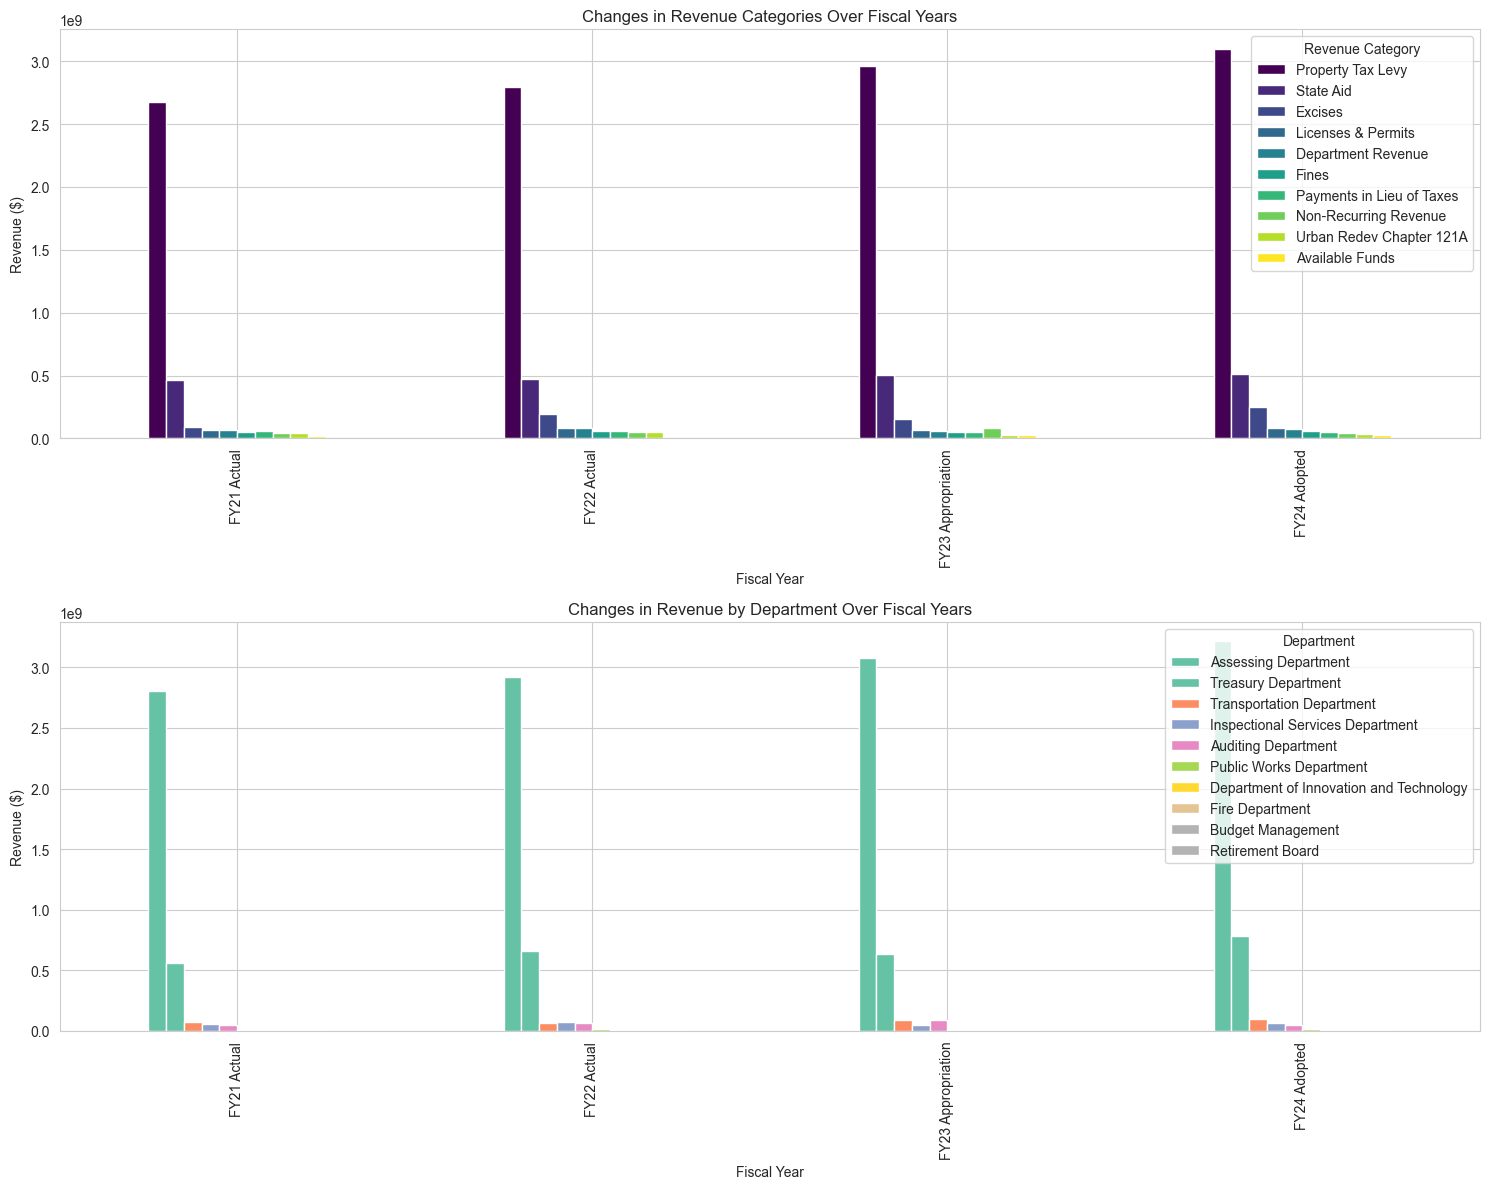

In [30]:
# Selecting the top revenue categories for visualization
top_revenue_categories = revenue_changes_by_category.sum(axis=1).sort_values(ascending=False).head(10).index
revenue_changes_by_category_top = revenue_changes_by_category.loc[top_revenue_categories]

# Visualization: Changes in Revenue by Department

# Selecting the top departments for visualization
top_departments = revenue_changes_by_department.sum(axis=1).sort_values(ascending=False).head(10).index
revenue_changes_by_department_top = revenue_changes_by_department.loc[top_departments]

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Changes in Revenue Categories
revenue_changes_by_category_top.T.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title('Changes in Revenue Categories Over Fiscal Years')
axes[0].set_ylabel('Revenue ($)')
axes[0].set_xlabel('Fiscal Year')
axes[0].legend(title='Revenue Category')

# Changes in Revenue by Department
revenue_changes_by_department_top.T.plot(kind='bar', ax=axes[1], colormap='Set2')
axes[1].set_title('Changes in Revenue by Department Over Fiscal Years')
axes[1].set_ylabel('Revenue ($)')
axes[1].set_xlabel('Fiscal Year')
axes[1].legend(title='Department')

plt.tight_layout()
plt.show()


## Revenue Shift Findings

###  Changes in Revenue Categories
- **Property Tax Levy:** This is the largest source of revenue for the city, consistently increasing over the years.
- **State Aid:** Significant revenue comes from state aid, with a noticeable increase, particularly from FY22 to FY24.
- **Excises:** There is a noticeable increase in revenue from excises, especially from FY22 onwards.
- Other categories such as “Utility Franchise”, “Charges for Services”, and “Fines & Forfeits” also contribute to the city’s revenue.

### Changes in Revenue by Department
- **Treasury Department:** This department sees the largest revenue, particularly in FY22 and FY24.
- **Boston Public Schools:** Significant revenue is allocated to Boston Public Schools, with a notable increase in FY22.
- **Transportation Department:** There is a noticeable increase in revenue for the Transportation Department from FY21 to FY22.
- Other departments such as “Neighborhood Development”, “Public Works”, and “Library” also receive substantial revenue.



## Correlate Revenue Changes with Departmental Spending at the Cabinet Level (In progress)

#### Merge with operational data

In [42]:
# Merging Revenue Data with Operational Budget Data on 'Cabinet' field
merged_data_op = pd.merge(revenue_data_cleaned, operational_budget_data, left_on='Cabinet', right_on='Cabinet', how='inner')

# Displaying the first few rows of the merged data
merged_data_op.head()


,Revenue Category,Account,Cabinet,Department,FY21 Actual,FY22 Actual,FY23 Appropriation_x,FY24 Adopted_x,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation_y,FY24 Adopted_y
0,Department Revenue,City Clerk Fees,Non-Mayoral Departments,City Clerk,438256.0,590958.0,500000.0,600000.0,City Clerk,Legislative Support,Personnel Services,362193.01,378408.60,494562.2642,494334.2711
1,Department Revenue,City Clerk Fees,Non-Mayoral Departments,City Clerk,438256.0,590958.0,500000.0,600000.0,City Clerk,Legislative Support,Contractual Services,12099.11,24621.90,223482.0000,15194.0000
2,Department Revenue,City Clerk Fees,Non-Mayoral Departments,City Clerk,438256.0,590958.0,500000.0,600000.0,City Clerk,Legislative Support,Supplies & Materials,5996.21,7973.96,8949.0000,8949.0000
3,Department Revenue,City Clerk Fees,Non-Mayoral Departments,City Clerk,438256.0,590958.0,500000.0,600000.0,City Clerk,Legislative Support,Current Charges & Obligations,NaN,474.81,0.0000,NaN
4,Department Revenue,City Clerk Fees,Non-Mayoral Departments,City Clerk,438256.0,590958.0,500000.0,600000.0,City Clerk,Legislative Support,Equipment,NaN,16439.81,NaN,0.0000


In [49]:
revenue_data_cleaned = revenue_data.copy()
for col in ['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']:
    revenue_data_cleaned[col] = pd.to_numeric(revenue_data[col].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')

total_revenue_cleaned = revenue_data_cleaned[['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']].sum()

total_project_budget = capital_budget_data['Total_Project_Budget'].sum()
total_revenue_cleaned, total_project_budget


(FY21 Actual           3618602554
 FY22 Actual           3934256011
 FY23 Appropriation    4062678869
 FY24 Adopted          4339861718
 dtype: int64,
 4040164110.0)